<a href="https://colab.research.google.com/github/PanagiotisPetrid/ASTRO-BEAM-recruitment/blob/main/ASTRO_BEAM_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following notebook is a copy of the notebook ASTRO_BEAM_recruitment, but with small changes, according to Task 7 of the recruitment task.
The changes are the following:

*   **New** sample signal (used a sin and a cos wave to generate)
*   Used a **brownian noise** type in step 1
*   Used **polynomial curve fitting** to subtract background noise in step 2.2
*   Used the **Savitzky-Golay algorithm** to smooth the curve at step 2.3
*   Used **polynomial interpolation** in step 3 to subtract background signal
*   Used **spline interpolation** in step 4 to upsample the signal samples

In [2]:
# Execute this block to install the necessary dependencies
%pip install colorednoise
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn
from scipy.signal import savgol_filter
from scipy.interpolate import UnivariateSpline

#1. Simulating a radio signal

##Creating an "off" signal

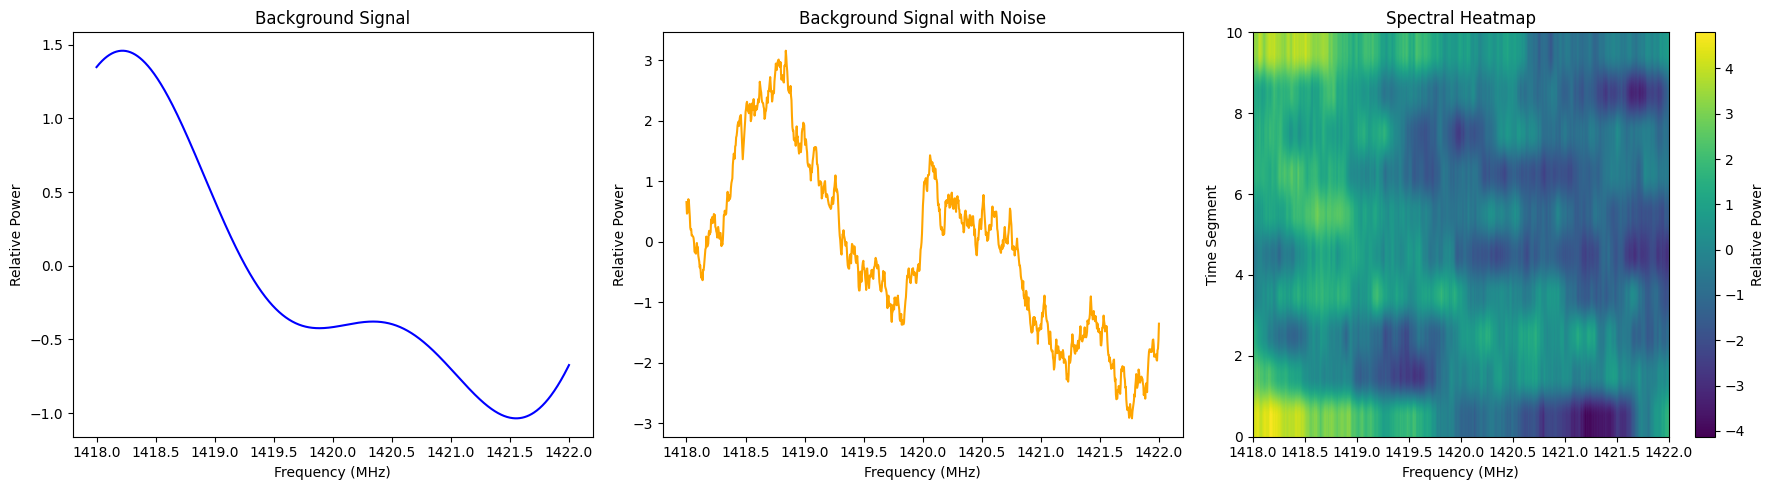

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn  # Ensure you have this library installed

# Signal parameters
n_samples = 1000  # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # Evenly spaced frequencies of the signal (bandwidth of 4 MHz)

# Create a sample signal using a sine and cosine wave
background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))

# Noise generation (Brownian noise with β = 2)
beta = 2  # Exponent for noise (β = 2 corresponds to brownian noise)
noise = cn.powerlaw_psd_gaussian(beta, n_samples)

# Add noise to the background signal
background_signal_noised = background_signal + noise

#-------------------------------------------------------------------------------------------------------------
# Signal parameters (same as before)
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)

# Defined a function to automate random sample signal generation
def generate_background_signal(freq_range):
    background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))
    beta = 2
    noise = cn.powerlaw_psd_gaussian(beta, n_samples)
    background_signal_noised = background_signal + noise
    return background_signal_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_background_signal(freq_range)

#-------------------------------------------------------------------------------------------------------------
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot the background signal in the first subplot
axs[0].plot(freq_range, background_signal, color="blue")
axs[0].set_title("Background Signal")
axs[0].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Relative Power")

# Plot the background signal with noise in the second subplot
axs[1].plot(freq_range, background_signal_noised, color="orange")
axs[1].set_title("Background Signal with Noise")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Relative Power")

# Plot the heatmap in the third subplot
cax = axs[2].imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
axs[2].set_title("Spectral Heatmap")
axs[2].set_xlabel("Frequency (MHz)")
axs[2].set_ylabel("Time Segment")
plt.colorbar(cax, ax=axs[2], label="Relative Power")

# Display the plots
plt.tight_layout()
plt.show()

##Creating an "on" signal

Steps 1-4 | Introducing the hydrogen line at 1420 MHz

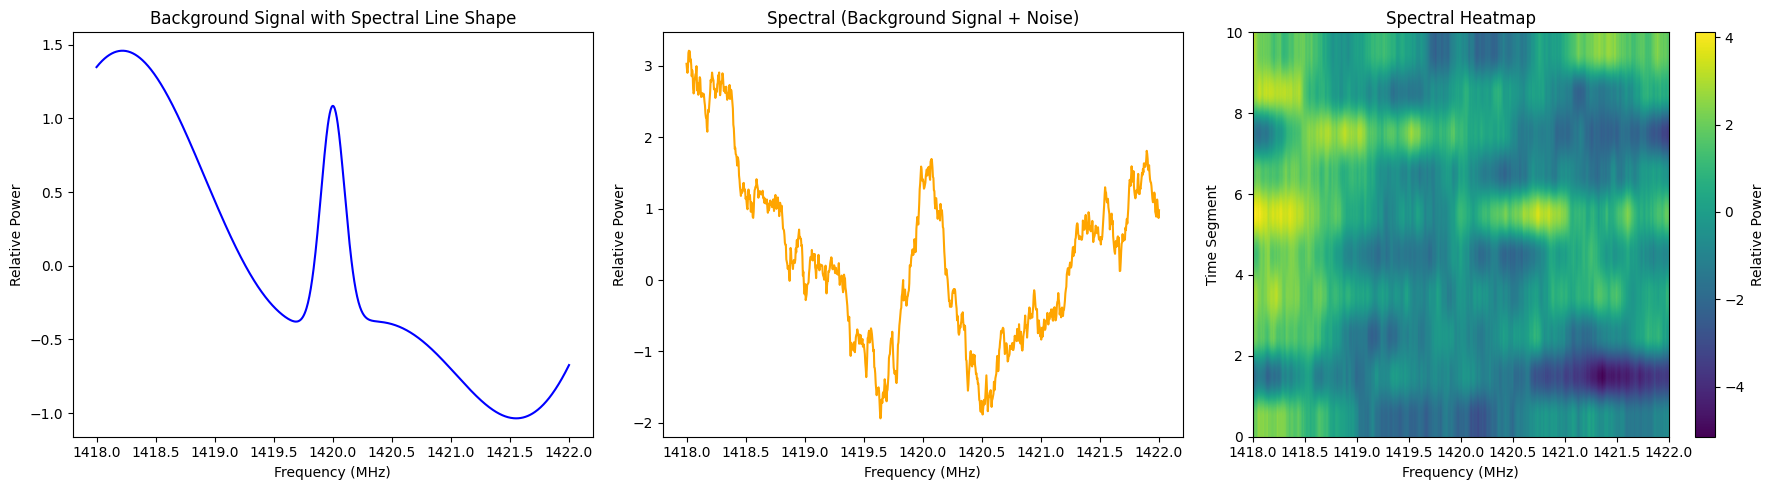

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn  # Ensure you have this library installed

# Signal parameters
n_samples = 1000  # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # Evenly spaced frequencies of the signal (bandwidth of 4 MHz)

# Create a sample signal using sine and cosine waves
background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)

# Add the spectral_line_shape to the background signal
background_signal += 1.5 * spectral_line_shape

# Noise generation (Brownian noise with β = 2)
beta = 2  # Exponent for noise (β = 2 corresponds to brownian noise)
noise = cn.powerlaw_psd_gaussian(beta, n_samples)

# Add noise to the background signal to create the spectral signal
spectral = background_signal + noise
#-------------------------------------------------------------------------------------------------------------
# Signal parameters (same as before)
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)

# Defined a function to automate random sample signal generation
def generate_spectral_signal(freq_range):
    background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))
    beta = 2
    noise = cn.powerlaw_psd_gaussian(beta, n_samples)
    background_spectral_noised = background_signal + noise # Add noise
    spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
    background_spectral_noised += spectral_line_shape # Add spectral line shape
    return background_spectral_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_spectral_signal(freq_range)

#-------------------------------------------------------------------------------------------------------------
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot the background signal with spectral line in the first subplot
axs[0].plot(freq_range, background_signal, color="blue")
axs[0].set_title("Background Signal with Spectral Line Shape")
axs[0].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Relative Power")

# Plot the background signal with noise in the second subplot
axs[1].plot(freq_range, spectral, color="orange")
axs[1].set_title("Spectral (Background Signal + Noise)")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Relative Power")

# Plot the heatmap in the third subplot
cax = axs[2].imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
axs[2].set_title("Spectral Heatmap")
axs[2].set_xlabel("Frequency (MHz)")
axs[2].set_ylabel("Time Segment")
plt.colorbar(cax, ax=axs[2], label="Relative Power")

# Display the plots
plt.tight_layout()
plt.show()

Gnerating the spactral line shape with twice the samples

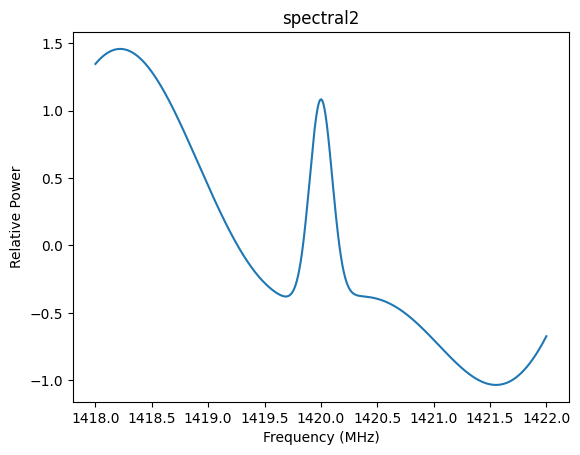

In [ ]:
# Signal parameters
n_samples2 = 2000 # Twice the previous number of sample measurements
freq_range2 = np.linspace(1418, 1422, n_samples2)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Created a sample signal using a sin and a cos wave
spectral2 = (0.5 * np.sin(0.8 * np.pi * freq_range2) + np.cos(0.4 * np.pi * freq_range2 + 2))

# Add the spectral line at 1420 MHz
spectral_line_shape2 = np.exp(-0.5 * ((freq_range2 - 1420) / 0.1)**2)

# Add the spectral_line_shape to the background signal
spectral2 += 1.5 * spectral_line_shape2

#Plot the background signal
plt.plot(freq_range2, spectral2)
plt.title("spectral2")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#To continue the task, execute the following code (ensures more predictable noise by generating noise with μ = 0, σ = 0.2)

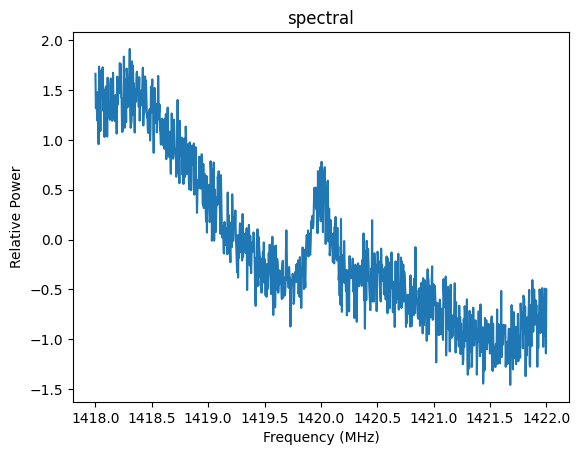

In [3]:
# Signal parameters
n_samples = 1000  # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # Frequencies of the signal (with a bandwidth of 4 MHz)

# Create a sample signal using 2 random sin waves
background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))

# Noise generation
noise = np.random.normal(0, 0.2, len(background_signal))  # Generate noise with μ = 0, σ = 0.2

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.8 * ((freq_range - 1420) / 0.1)**2)

# Generate the "spectral" signal
spectral = background_signal + noise + spectral_line_shape

#Plot the spectral signal to ensure correct execution of code
plt.plot(freq_range, spectral)
plt.title("spectral")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#2. Signal Smoothing

2.1 Averaging over time

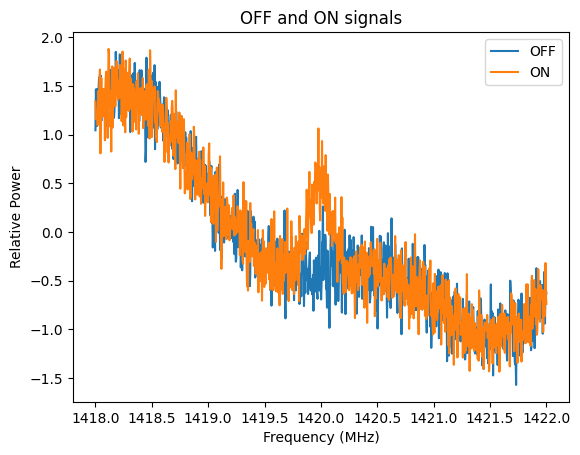

In [5]:
# Signal parameters
n_samples = 1000 # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Creating "OFF" signal according to previous steps
background_signal_OFF = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))
noise = np.random.normal(0, 0.2, len(background_signal))
signal_OFF = background_signal_OFF + noise

#Create "ON" signal according to previous steps
background_signal_ON = background_signal_OFF
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
background_signal_ON += spectral_line_shape
noise = np.random.normal(0, 0.2, len(background_signal))
signal_ON = background_signal_ON + noise

#Plot both the signals
plt.plot(freq_range, signal_OFF, label="OFF")
plt.plot(freq_range, signal_ON, label="ON")
plt.title("OFF and ON signals")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.legend()
plt.show()

2.2 Removing Background

<ipython-input-6-c7dc8985d320>:8: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(freq_range, signal_ON, degree)


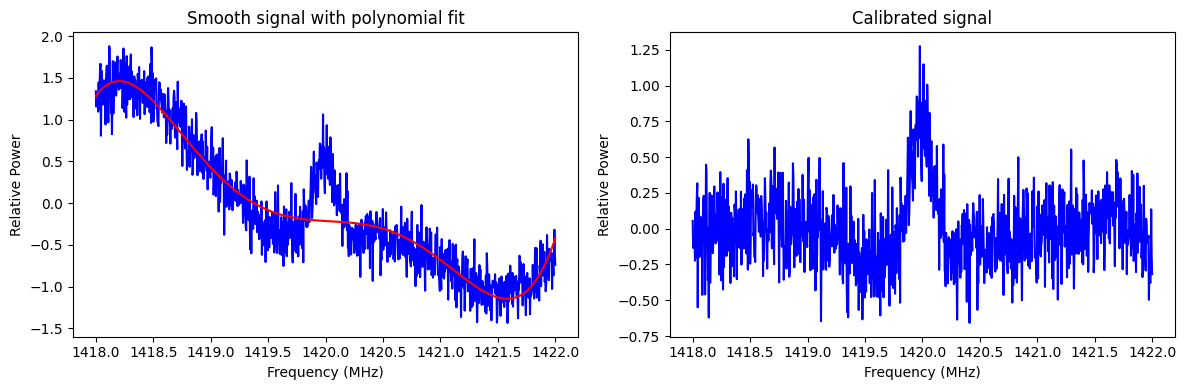

Fitted coefficients: [ 2.97344365e-116  1.05678368e-113 -1.38212646e-110 -4.24614239e-107
 -7.30713043e-104 -1.01372811e-100 -1.20511591e-097 -1.20165400e-094
 -8.59842188e-092  7.79205886e-091  1.63102318e-085  4.26743838e-082
  8.16299739e-079  1.34957686e-075  2.02365846e-072  2.80211536e-069
  3.57961448e-066  4.15433466e-063  4.17194637e-060  3.06905893e-057
  1.36204262e-056 -6.15230396e-051 -1.69200633e-047 -3.40098765e-044
 -5.91459329e-041 -9.33827270e-038 -1.36086055e-034 -1.83013449e-031
 -2.23376287e-028 -2.35617562e-025 -1.82018777e-022 -2.79113282e-021
  3.87203746e-016  1.09337560e-012  2.21230151e-009  3.75544209e-006
  5.46080330e-003  6.40203426e+000  4.20683021e+003 -6.46080169e+006
 -3.67257911e+010]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Degree of the polynomial fit
degree = 40  # Note: may cause overfitting in some cases if the polynomial degree is very high

# Fit the polynomial to the smooth data
coefficients = np.polyfit(freq_range, signal_ON, degree)
polynomial_fit = np.poly1d(coefficients)

# Generate fitted values
fit_y_poly = polynomial_fit(freq_range)

#Calibrate signal by subtracting polynomial fit from the original signal
calibrated_signal = signal_ON - fit_y_poly

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#Plot the original smooth signal along with the poly fit
axs[0].plot(freq_range, signal_ON, label='Data', color='blue')
axs[0].plot(freq_range, fit_y_poly, '-', label=f'Polynomial Fit (Degree {degree})', color='red')
axs[0].set_title("Smooth signal with polynomial fit")
axs[0].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Relative Power")

# Plot the new calibrated_signal
axs[1].plot(freq_range, calibrated_signal, label='Data', color='blue')
axs[1].set_title("Calibrated signal")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Relative Power")

# Show the plots
plt.tight_layout()
plt.show()

# Display fitted coefficients
print(f"Fitted coefficients: {coefficients}")

2.3 Savitzky-Golay filter

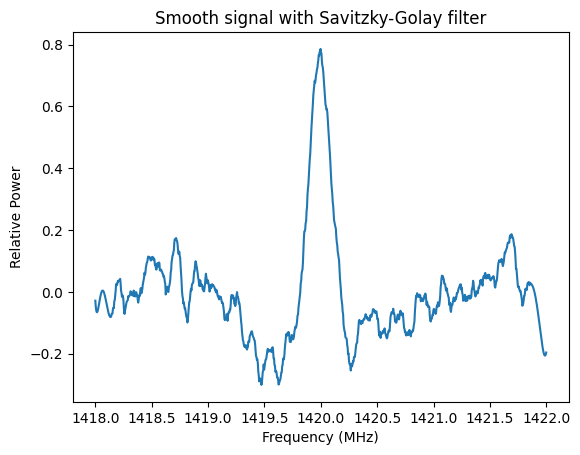

In [48]:
# Apply Savitzky-Golay filter to smooth the data
window_length = 71 # window_length: The length of the filter window (must be odd)
polyorder = 7  # polyorder: The order of the polynomial used to fit the samples

# Apply the Savitzky-Golay filter to the calibrated signal
smooth = savgol_filter(calibrated_signal, window_length=window_length, polyorder=polyorder)

# Plot the smoothed signal
plt.plot(freq_range, smooth)
plt.title("Smooth signal with Savitzky-Golay filter")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#3. Spectral Line Detection

Identifying the frequency where the spectral line peaks

Longest positive range: (1419.7817817817818, 1419.993993993994)
Longest negative range: (1419.997997997998, 1420.2622622622623)
Intercepts between y=0 and smooth signal within 1419.7817817817818-1420.2622622622623 MHz: [1419.9963020501418]


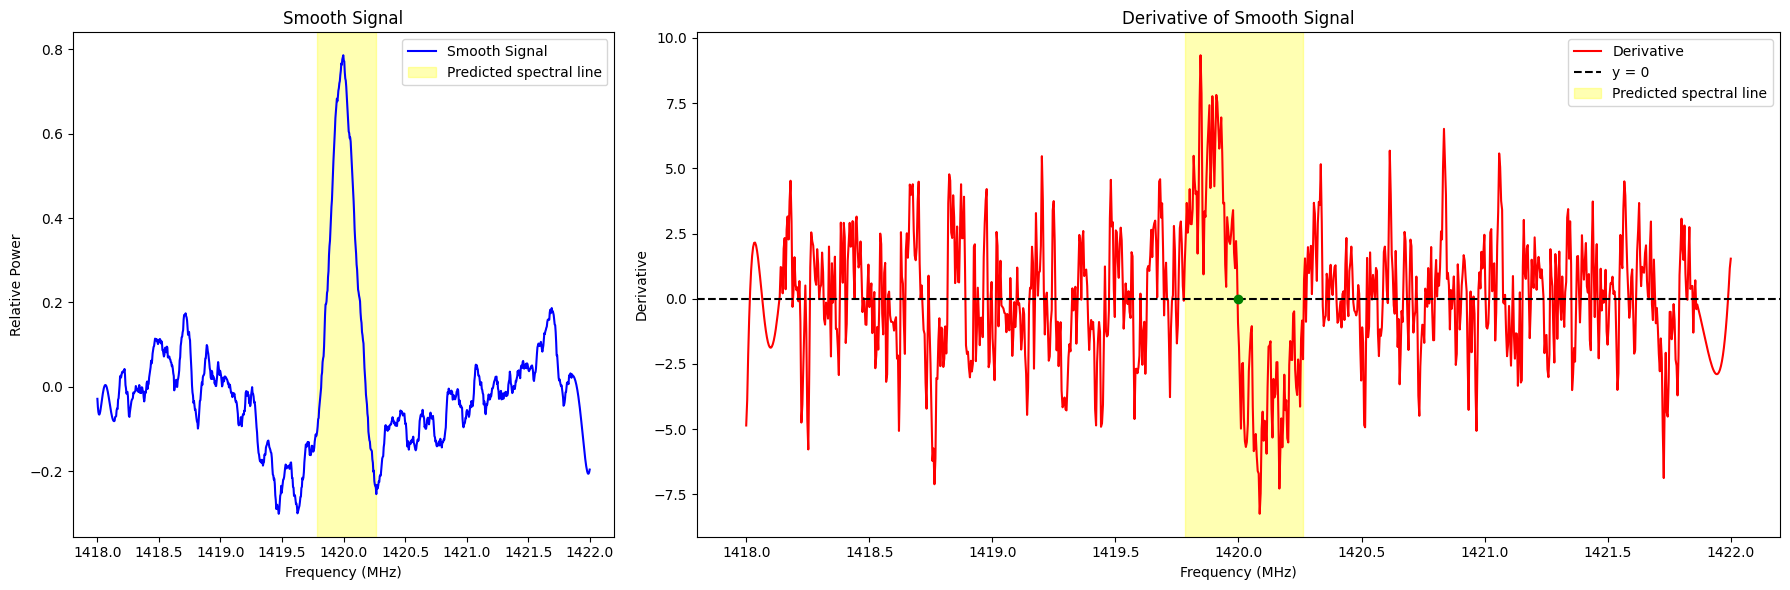

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Initiate derivative list
derivative = np.zeros(len(smooth))

# Find the slope between every two consecutive points
for i in range(1, len(smooth) - 1):
    derivative[i] = (smooth[i+1] - smooth[i-1]) / (freq_range[i+1] - freq_range[i-1])

# Calculate derivatives for first and last point
derivative[0] = (smooth[1] - smooth[0]) / (freq_range[1] - freq_range[0])
derivative[-1] = (smooth[-1] - smooth[-2]) / (freq_range[-1] - freq_range[-2])

# Find intercept between the derivative and y=0
zero_crossings = np.where(np.diff(np.sign(derivative)))[0]
intercepts = []
for zc in zero_crossings:
    # Estimate intercept point by using linear interpolation
    x1, x2 = freq_range[zc], freq_range[zc + 1]
    y1, y2 = derivative[zc], derivative[zc + 1]
    intercept_x = x1 - y1 * (x2 - x1) / (y2 - y1)
    intercepts.append(intercept_x)

# Find the longest freq_range where the derivative is positive and the longest freq_range where it's negative
positive_ranges = []
negative_ranges = []

current_start = None
current_sign = None

for i in range(1, len(derivative)):
    if derivative[i] > 0:
        if current_sign != 'positive':
            if current_sign == 'negative' and current_start is not None:
                negative_ranges.append((current_start, freq_range[i-1]))
            current_start = freq_range[i]
            current_sign = 'positive'
    elif derivative[i] < 0:
        if current_sign != 'negative':
            if current_sign == 'positive' and current_start is not None:
                positive_ranges.append((current_start, freq_range[i-1]))
            current_start = freq_range[i]
            current_sign = 'negative'

# Append the last range
if current_sign == 'positive' and current_start is not None:
    positive_ranges.append((current_start, freq_range[-1]))
elif current_sign == 'negative' and current_start is not None:
    negative_ranges.append((current_start, freq_range[-1]))

# Find the longest positive and negative ranges
longest_positive_range = max(positive_ranges, key=lambda x: x[1] - x[0]) if positive_ranges else None
longest_negative_range = max(negative_ranges, key=lambda x: x[1] - x[0]) if negative_ranges else None

# Define the start of the longest positive range and end of the longest negative range
range_start = longest_positive_range[0] if longest_positive_range else None
range_end = longest_negative_range[1] if longest_negative_range else None

# Print the longest ranges
print(f"Longest positive range: {longest_positive_range}")
print(f"Longest negative range: {longest_negative_range}")

# Cycle through the intercepts and append them to smooth_intercepts if they are between the range of the spectral line peak
smooth_intercepts = []
for i in range(len(intercepts)):
    if range_start <= intercepts[i] <= range_end:
        smooth_intercepts.append(intercepts[i])

# Print intercepts within the defined range
print(f"Intercepts between y=0 and smooth signal within {range_start}-{range_end} MHz: {smooth_intercepts}")

# Create the plots with custom width ratios
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [6, 12]})

# Plot the original smooth signal (left plot)
axs[0].plot(freq_range, smooth, label='Smooth Signal', color='blue')
axs[0].axvspan(range_start, range_end, color='yellow', alpha=0.3, label='Predicted spectral line')  # Highlight the range
axs[0].set_title('Smooth Signal')
axs[0].set_xlabel('Frequency (MHz)')
axs[0].set_ylabel('Relative Power')
axs[0].legend()

# Plot the derivative with y=0 line and intercepts (right plot)
axs[1].plot(freq_range, derivative, label='Derivative', color='red')
axs[1].axhline(0, color='black', linestyle='--', label='y = 0')  # y=0 line
axs[1].axvspan(range_start, range_end, color='yellow', alpha=0.3, label='Predicted spectral line')  # Highlight the range

# Mark the intercept points on the plot only in the selected range
for intercept_x in intercepts:
    if range_start <= intercept_x <= range_end:
        axs[1].plot(intercept_x, 0, 'go')

axs[1].set_title('Derivative of Smooth Signal')
axs[1].set_xlabel('Frequency (MHz)')
axs[1].set_ylabel('Derivative')
axs[1].legend()

plt.tight_layout()
plt.show()

Calculating the SNR(db)

In [ ]:
# #We calculate SNR by dividing the ON signal by the OFF signal and converting it to decibels
# SNR = 10 * np.log10(signal_ON + 2 / signal_OFF + 2)

# #Plot the SNR(db) along with a horizontal line, showing where the SNR(db) is higher than 1
# plt.plot(freq_range, SNR)
# plt.title("SNR(db)")
# plt.xlabel("Frequency (MHz)")
# plt.ylabel("SNR(db)")
# plt.show()

#4. Upsamping

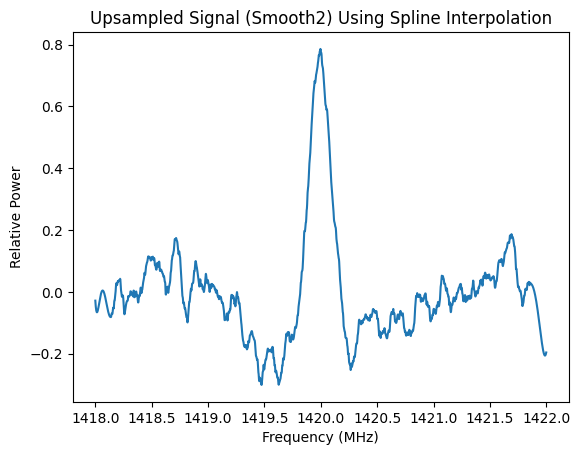

In [50]:
# Create a spline interpolation of the smooth signal
# Spline interpolation fits low-degree polynomials to small subsets of the values,
# instead of fitting a single, high-degree polynomial to all of the values at once (which happens when using polynomial interpolation)

spline = UnivariateSpline(freq_range, smooth, s=0)  # s=0 means no smoothing; it will interpolate through the data points

# Upsample the smooth signal by evaluating the spline at 2000 points
freq_range2 = np.linspace(freq_range[0], freq_range[-1], 2000)
smooth2 = spline(freq_range2)

# Plot the upsampled signal
plt.plot(freq_range2, smooth2)
plt.title("Upsampled Signal (Smooth2) Using Spline Interpolation")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#5. Spectral Line Fitting

Fitting the smooth signal

<ipython-input-51-5c36b9f18936>:11: RankWarning: Polyfit may be poorly conditioned
  fit_poly_coefficients = np.polyfit(freq_range_subset, smooth_subset, fit_degree)


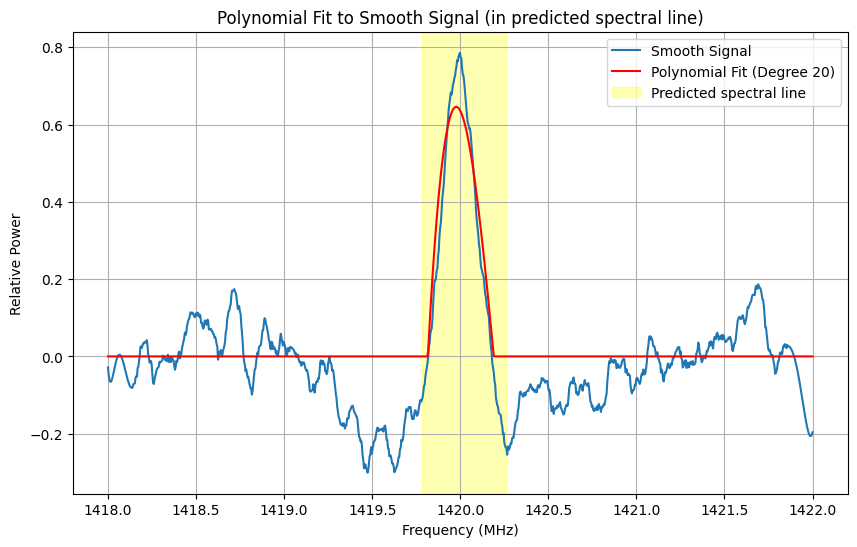

Polynomial coefficients (degree 20) for the predicted spectral line range:
 [ 2.40429836e-55  1.36494537e-52 -2.05740172e-50 -2.36989756e-46
 -5.11456530e-43 -8.28472153e-40 -1.14856639e-36 -1.39487871e-33
 -1.43619693e-30 -1.06805267e-27  3.24272626e-27  2.16265005e-21
  5.85142712e-18  1.14508978e-14  1.90045560e-11  2.76323863e-08
  3.43844667e-05  3.21010097e-02  5.54404640e+00 -7.54208331e+04
 -2.67608181e+08]


In [51]:
fit_degree = 20  # The degree of the polynomial

# Define the range boundaries (assuming you have range_start and range_end)
mask = (freq_range >= range_start) & (freq_range <= range_end)

# Extract the data within the selected range
freq_range_subset = freq_range[mask]
smooth_subset = smooth[mask]

# Perform polynomial fitting using np.polyfit within the selected range
fit_poly_coefficients = np.polyfit(freq_range_subset, smooth_subset, fit_degree)

# Generate the fitted polynomial values only in the selected range
fit_subset = np.polyval(fit_poly_coefficients, freq_range_subset)

# Create a new fit array that is equal to zero everywhere
fit = np.zeros_like(freq_range)

# Replace the values in the selected range with the fitted polynomial
fit[mask] = fit_subset

# Set any negative values in the fit to zero (to ensure non-neagative values)
fit[fit < 0] = 0

# Plot the original smooth signal and the fitted polynomial within the range
plt.figure(figsize=(10, 6))

# Plot the original smooth signal across the full frequency range
plt.plot(freq_range, smooth, label='Smooth Signal')

# Plot the fitted polynomial
plt.plot(freq_range, fit, '-', label=f'Polynomial Fit (Degree {fit_degree})', color='red')

# Highlight the selected range on the smooth signal plot
plt.axvspan(range_start, range_end, color='yellow', alpha=0.3, label='Predicted spectral line')

plt.title('Polynomial Fit to Smooth Signal (in predicted spectral line)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.legend()
plt.grid()
plt.show()

# Display the polynomial coefficients
print(f"Polynomial coefficients (degree {fit_degree}) for the predicted spectral line range:\n {fit_poly_coefficients}")

Fitting the smooth2 signal

<ipython-input-52-7a41342b79ec>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coefficients2 = np.polyfit(freq_range2_subset, smooth2_subset, degree2)


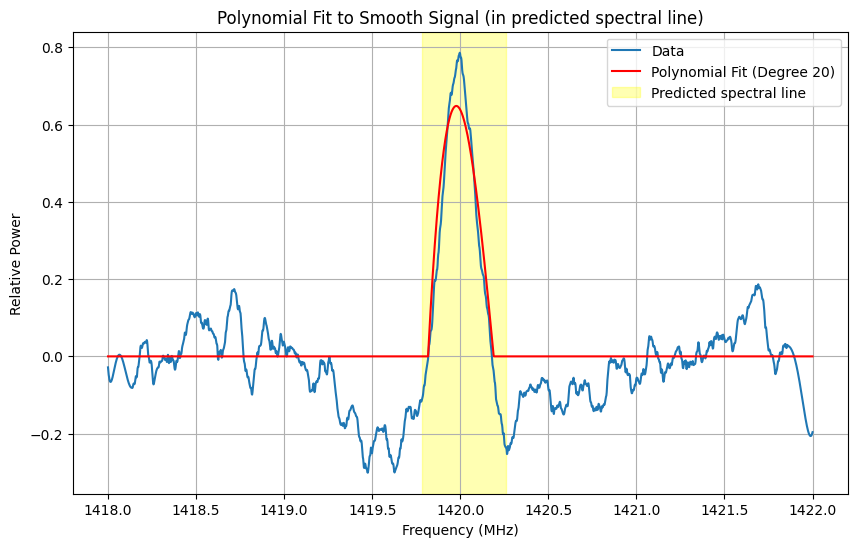

Polynomial coefficients (degree 20) for the predicted spectral line range:
 [ 2.46459326e-55  1.39918886e-52 -2.10877290e-50 -2.42929568e-46
 -5.24277986e-43 -8.49246653e-40 -1.17736809e-36 -1.42985529e-33
 -1.47221536e-30 -1.09486227e-27  3.28133547e-27  2.21682108e-21
  5.99801521e-18  1.17378698e-14  1.94809054e-11  2.83249936e-08
  3.52465082e-05  3.29060705e-02  5.68344138e+00 -7.73104031e+04
 -2.74314535e+08]


In [52]:
degree2 = 20  # The degree of the polynomial

# Define the range boundaries (assuming you have range_start and range_end)
mask2 = (freq_range2 >= range_start) & (freq_range2 <= range_end)

# Extract the data within the specified range
freq_range2_subset = freq_range2[mask2]
smooth2_subset = smooth2[mask2]

# Perform polynomial fitting using np.polyfit within the selected range
poly_coefficients2 = np.polyfit(freq_range2_subset, smooth2_subset, degree2)

# Generate the fitted polynomial values only in the selected range
fit2_subset = np.polyval(poly_coefficients2, freq_range2_subset)

# Create a new fit array that is equal to zero everywhere
fit2 = np.zeros_like(freq_range2)

# Replace the values in the selected range with the fitted polynomial
fit2[mask2] = fit2_subset

# Set any negative values in the fit to zero (to ensure non-neagative values)
fit2[fit2 < 0] = 0

# Plot the original smooth signal and the fitted polynomial within the range
plt.figure(figsize=(10, 6))

# Plot the original smooth signal across the full frequency range
plt.plot(freq_range2, smooth2, label='Data')

# Plot the fitted polynomial, where it's non-zero only in the selected range
plt.plot(freq_range2, fit2, '-', label=f'Polynomial Fit (Degree {degree2})', color='red')

# Highlight the selected range on the smooth signal plot
plt.axvspan(range_start, range_end, color='yellow', alpha=0.3, label='Predicted spectral line')

plt.title('Polynomial Fit to Smooth Signal (in predicted spectral line)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.legend()
plt.grid()
plt.show()

# Display the polynomial coefficients
print(f"Polynomial coefficients (degree {degree2}) for the predicted spectral line range:\n {poly_coefficients2}")

#6. Error estimation

We compare the "fit" and "spectral" signals

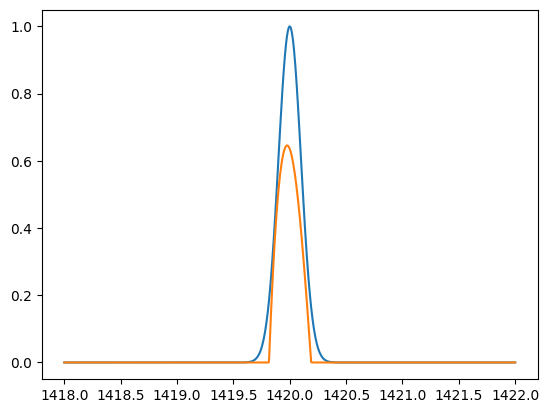

Mean Squared Error (MSE): 0.011092295718866975
Root Mean Squared Error (RMSE): 0.10531996828174121
Coefficient of Determination (R^2): 0.6542298290561084


In [53]:
# We firsly plot the "fit" and "spectral" signals in the same graph
plt.plot(freq_range, spectral_line_shape, label='smooth')
plt.plot(freq_range, fit, label='fit')
plt.show()

# Calculate residuals
residuals = smooth - fit

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R^2
ss_res = np.sum(residuals**2)
ss_tot = np.sum((smooth - np.mean(smooth))**2)
r_squared = 1 - (ss_res / ss_tot)

# Print error metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r_squared}")

We compare the "fit2" and "spectral2" signals

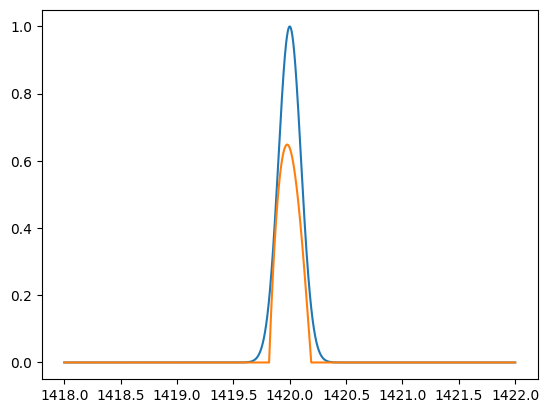

Mean Squared Error (MSE): 0.011059313210063534
Root Mean Squared Error (RMSE): 0.10516326930094715
Coefficient of Determination (R^2): 0.6553032536508832


In [54]:
#Upsample the spectral_line_shape
spectral_line_shape2 = np.interp(np.linspace(freq_range[0], freq_range[-1], 2000), freq_range, spectral_line_shape)

# We firsly plot the "fit2" and "spectral_line_shape2" signals in the same graph
plt.plot(freq_range2, spectral_line_shape2, label='smooth')
plt.plot(freq_range2, fit2, label='fit')
plt.show()

# Calculate residuals
residuals2 = smooth2 - fit2

# Calculate Mean Squared Error (MSE)
mse2 = np.mean(residuals2**2)

# Calculate Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mse2)

# Calculate R^2
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((smooth2 - np.mean(smooth2))**2)
r_squared2 = 1 - (ss_res2 / ss_tot2)

# Print error metrics
print(f"Mean Squared Error (MSE): {mse2}")
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print(f"Coefficient of Determination (R^2): {r_squared2}")